# Classification

In [1]:
from sklearn.base import BaseEstimator
class NeverChurnClassifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Packages.data import load_csv_to_dataframe, plot_roc_curve, plot_feature_importance # show_tree,
from Packages.data import plot_learning_curves, train_test
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, mean_squared_error

In [3]:
pip freeze

absl-py==0.10.0
aiohttp==3.6.2
alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.12
anaconda-project==0.8.3
asn1crypto==1.0.1
astor==0.8.1
astroid==2.3.1
astropy==3.2.1
async-timeout==3.0.1
atomicwrites==1.3.0
attrs==19.2.0
Babel==2.7.0
backcall==0.1.0
backports.functools-lru-cache==1.6.1
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.8.0
bitarray==1.0.1
bkcharts==0.2
bleach==3.1.0
blinker==1.4
bokeh==1.3.4
boto==2.49.0
Bottleneck==1.2.1
cachetools==4.1.1
certifi==2019.9.11
cffi==1.12.3
chardet==3.0.4
Click==7.0
cloudpickle==1.2.2
clyent==1.2.2
colorama==0.4.1
comtypes==1.1.7
conda==4.8.5
conda-build==3.18.9
conda-package-handling==1.7.0
conda-verify==3.4.2
contextlib2==0.6.0
cryptography==2.7
cycler==0.10.0
Cython==0.29.13
cytoolz==0.10.0
dask==2.5.2
decorator==4.4.0
defusedxml==0.6.0
dill==0.3.2
distributed==2.5.2
docutils==0.15.2
entrypoints==0.3
et-xmlfile==1.0.1
fastcache==1.1.0
fi

### Load data from Packages.data

In [4]:
file = '../Data/data.csv'
df = load_csv_to_dataframe(file)
# print(df.columns)

### Prepare dataframe for train, validation, test split

* 'customerID': drop. A random string assigned to each customer.
* 'tenure'    : drop. A categorical feature was created for this.
* 'MonthlyCharges' : drop. A categorical feature was created for this.
* 'TotalCharges'   : drop. A categorical feature ...
* 'Churn'          : drop. The label is dropped from the X_train, X_test, X_valid datasets

The 'X' dataframe is then one hot encoded via pandas.get_dummies()

In [5]:
X = df.drop(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Churn_cat'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['Churn_cat']

### Split data into training, validation and test

The full dataset is split into three parts (training, test, validation).  

Stratified splits due to the unequal partitioning of the dataset (No: 5163 (73%), Yes: 1869 (27%))

In [6]:
#X_train, X_test, X_valid, y_train, y_test, y_valid = train_test_valid(X, y)
X_train, X_test, y_train, y_test = train_test(X, y)

In [7]:
print(f"Dataframe: {df.shape}, X.shape: {X.shape}, y.shape: {y.shape}")
print(f"training shape: {X_train.shape},  testing shape: {X_test.shape}") # validiation shape: {X_valid.shape},
print(f"training labels: {y_train.shape},  testing labels: {y_test.shape}") # validation shape: {y_valid.shape},

Dataframe: (7032, 25), X.shape: (7032, 30), y.shape: (7032,)
training shape: (5625, 30),  testing shape: (1407, 30)
training labels: (5625,),  testing labels: (1407,)


## White Box Models

### DecisionTreeClassifier

The assignment is to compare a Decision Tree classifier with Random Forest

In [35]:
# From the future....
# Best params: {'max_depth': 5, 'max_features': 30, 'max_leaf_nodes': 10, 'min_samples_split': 3}
#tree_clf = DecisionTreeClassifier(max_depth=5, max_features=30, max_leaf_nodes=10, min_samples_split=3)
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_predict_test = tree_clf.predict(X_test)
y_predict_train = tree_clf.predict(X_train)

In [9]:
print(tree_clf.get_params)

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')>


## Grid Search CV : Decision Tree Classifier

Consider exploring the following parameters...

* 'criterion' : ['gini', 'entropy']
* 'max_depth' :
* 'min_samples_split' :
* 'min_samples_leaf' :
* 'max_features' :
* 'max_leaf_nodes' :
* 'min_impurity_decrease' :

how to derive rules from a decision tree and select one or more rules for targeting specific groups. You need to derive rules, 2 or 3 rules for each of churn(yes) and churn(no). 

You can derive such rules from  different decision trees (learned using different hyperparameter and/or criteria). 

For this assessment, a rule is considered interesting if the purity of the corresponding leaf is 75% or above and it contains at least 50 cases.

min_impurity_decrease: float.   A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

In [10]:
def impurity_decrease(Nt, NtL, NtR, impurity, impurity_r, impurity_l):
    return Nt / 5625 * (impurity - NtR / Nt * impurity_r - NtL / Nt * impurity_l)

print(f"first node: {impurity_decrease(5625, 4130, 1495, 0.39, 0.441, 0.186):.4f}")
# print(f"second left node: {impurity_decrease(4130, 3604, 418, 0.186, )}")

first node: 0.1362


In [11]:
# Grid Search CV
params = {'max_depth' : [2, 5, 10, 20],
          'min_samples_split': [3, 10, 30],
          'max_leaf_nodes': [3, 10, 30],
          'max_features': [3, 10, 30],
         'min_samples_leaf': [100, 102, 104, 106]}
# 
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5) #  verbose=1, 
grid_search_cv.fit(X_train, y_train)
best_params = grid_search_cv.best_params_

### Grid Search CV: best score, best parameters

In [12]:
print(f"Grid search CV, best estimator: {grid_search_cv.best_estimator_}")
print(f"Best score: {grid_search_cv.best_params_}")
print(f"Best params: {grid_search_cv.best_params_}")
print(f"Best index: {grid_search_cv.best_index_}")

Grid search CV, best estimator: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=30, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')
Best score: {'max_depth': 5, 'max_features': 30, 'max_leaf_nodes': 10, 'min_samples_leaf': 100, 'min_samples_split': 3}
Best params: {'max_depth': 5, 'max_features': 30, 'max_leaf_nodes': 10, 'min_samples_leaf': 100, 'min_samples_split': 3}
Best index: 192


### Grid Search CV: best parameters for Validation

In [13]:
best_model_task1 = DecisionTreeClassifier(**best_params)
best_model_task1.fit(X_train, y_train)
y_predict_bp = best_model_task1.predict(X_test)
y_train_predict_bp = best_model_task1.predict(X_train)
bp_score = best_model_task1.score(X_test, y_test)

### Cross-Validation

Cross-Validation predictions based on default DecisionTreeClassifer() (tree_clf)

In [14]:
def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean: {scores.mean():.4f}")
    print(f"Std: {scores.std():.4f}")

In [15]:
# Cross-Val on tree_clf : no parameters
y_predict_cv = cross_val_predict(tree_clf, X_train, y_train, cv=5)
y_cv_scores = cross_val_score(tree_clf, X_train, y_train, cv=5)
#y_cv_scores = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Val predictions score: {y_predict_cv}")
display_scores(y_cv_scores)

Cross-Val predictions score: [0 0 1 ... 0 0 1]
Scores: [0.78577778 0.78577778 0.78488889 0.80888889 0.80355556]
Mean: 0.7938
Std: 0.0103


In [16]:
# Cross-Val on tree_clf_bp : best parameters
y_predict_bp_cv = cross_val_predict(best_model_task1, X_train, y_train, cv=5)
y_bp_cv_scores = cross_val_score(best_model_task1, X_train, y_train, cv=5, scoring='accuracy')
#y_cv_scores = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Val predictions score: {y_predict_bp_cv}")
display_scores(y_bp_cv_scores)

Cross-Val predictions score: [0 0 1 ... 0 0 1]
Scores: [0.84711111 0.85333333 0.84711111 0.84888889 0.85333333]
Mean: 0.8500
Std: 0.0028


In [17]:
from sklearn.tree import export_text
r = export_text(best_model_task1, show_weights=True, feature_names= list(X.columns)) 
print(r)

|--- SeniorCitizen_Yes <= 0.50
|   |--- tenure_cat <= 1.50
|   |   |--- InternetService_Fiber optic <= 0.50
|   |   |   |--- PaperlessBilling_Yes <= 0.50
|   |   |   |   |--- weights: [349.00, 36.00] class: 0
|   |   |   |--- PaperlessBilling_Yes >  0.50
|   |   |   |   |--- weights: [236.00, 68.00] class: 0
|   |   |--- InternetService_Fiber optic >  0.50
|   |   |   |--- weights: [151.00, 132.00] class: 0
|   |--- tenure_cat >  1.50
|   |   |--- PaymentMethod_Electronic check <= 0.50
|   |   |   |--- weights: [2280.00, 82.00] class: 0
|   |   |--- PaymentMethod_Electronic check >  0.50
|   |   |   |--- tenure_cat <= 2.50
|   |   |   |   |--- weights: [109.00, 38.00] class: 0
|   |   |   |--- tenure_cat >  2.50
|   |   |   |   |--- weights: [479.00, 62.00] class: 0
|--- SeniorCitizen_Yes >  0.50
|   |--- tenure_cat <= 5.50
|   |   |--- tenure_cat <= 1.50
|   |   |   |--- weights: [68.00, 532.00] class: 1
|   |   |--- tenure_cat >  1.50
|   |   |   |--- weights: [223.00, 431.00] class:

## Evaluation of White Box Models

* For untuned model and tuned model(s)
* Accuracy ($\hat{y} - y$)
* Error (MSE, RMSE)
* Cross-Validation (n-fold scores, mean, standard deviation)
* Confustion Matrix
* Precision
* Recall

In [18]:
# Confusion Matrix results
print("Untuned, training data")
print(confusion_matrix(y_train, y_predict_train))
print("Untuned, test data")
print(confusion_matrix(y_test, y_predict_test))
print()
print("Best parameters, test data")
print(confusion_matrix(y_test, y_predict_bp))


print()
print("Untuned: Cross-Val, training data")
print(confusion_matrix(y_train, y_predict_cv))
print()
print("Best parameters: Cross-Val, training data")
print(confusion_matrix(y_train, y_predict_bp_cv))

Untuned, training data
[[4098   32]
 [  89 1406]]
Untuned, test data
[[874 159]
 [137 237]]

Best parameters, test data
[[954  79]
 [124 250]]

Untuned: Cross-Val, training data
[[3567  563]
 [ 619  876]]

Best parameters: Cross-Val, training data
[[3824  306]
 [ 538  957]]


In [24]:
# create heatmap
import seaborn as sns
def confusion_plot(y, y_pred):
    matrix = confusion_matrix(y, y_pred)
    print(matrix)
    row_names = ['True No', 'True Yes']
    col_names = ['Predict No', 'Predict Yes']
    df_confusion = pd.DataFrame(matrix, index=row_names, columns=col_names)
    print(df_confusion)
    plt.figure(figsize = (6,5))
    sns.heatmap(df_confusion, annot=True,  cmap="Blues", fmt=".0f", annot_kws={"size": 16})    
    sns.set(font_scale=1.4)#for label size  
    plt.ylim([0,2])
    plt.gca().invert_yaxis()
    plt.title("Confusion Matrix")
    #plt.ylabel("True Class")
    #plt.xlabel("Predicted Class")
    plt.savefig('./confusion_matrix.png')
    plt.show()
    plt.close()
    

[[875 158]
 [141 233]]
          Predict No  Predict Yes
True No          875          158
True Yes         141          233


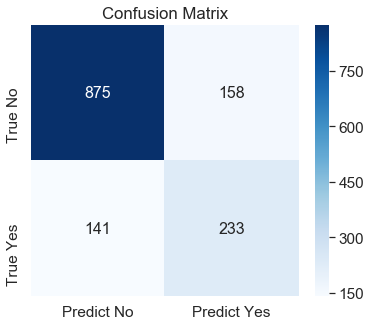

In [39]:
confusion_plot(y_test, y_predict_test)

[[954  79]
 [124 250]]
          Predict No  Predict Yes
True No          954           79
True Yes         124          250


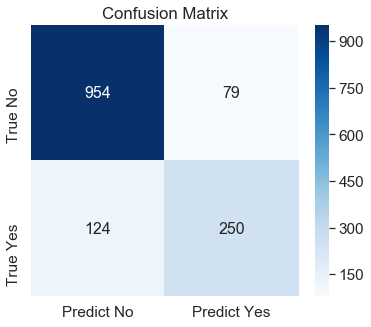

In [38]:
confusion_plot(y_test, y_predict_bp)

[[3567  563]
 [ 619  876]]
          Predict No  Predict Yes
True No         3567          563
True Yes         619          876


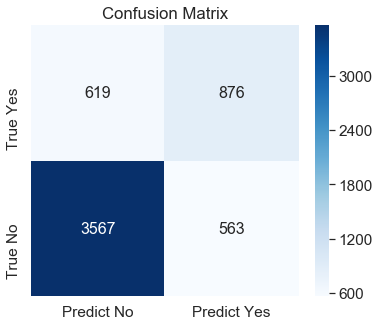

In [22]:
confusion_plot(y_train, y_predict_cv)

[[3824  306]
 [ 538  957]]
          Predict No  Predict Yes
True No         3824          306
True Yes         538          957


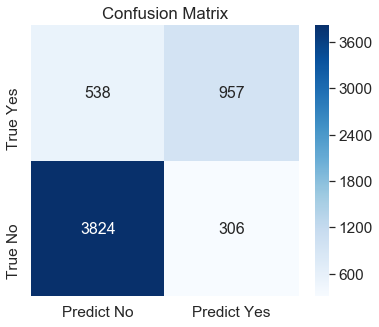

In [23]:
confusion_plot(y_train, y_predict_bp_cv)

### Classification Report

In [ ]:
print(sum(y_predict_train))
print(sum(y_predict_cv))
print(sum(y_predict_bp_cv))
################################################33
print("Accuracy for untuned")
print(f"Accuracy on training set: {tree_clf.score(X_train, y_train):.4f}")
print(f"Accuracy on test set:     {tree_clf.score(X_test, y_test):.4f}")
print(f"Accuracy on cv set:       {tree_clf.score(X_train, y_predict_cv):.4f}")

print("Accuracy for tuned")
print(f"Accuracy on training set: {best_model_task1.score(X_train, y_train):.4f}")
print(f"Accuracy on test set:     {best_model_task1.score(X_test, y_test):.4f}")
print(f"Accuracy on cv set:       {best_model_task1.score(X_train, y_predict_cv):.4f}")

######################################################
print()
# Precision, Recall and F1 Scores
print("Precision, Recall, F1 scores for 'Untuned'")
print("="*42)
print(f"Precision (test) : {precision_score(y_test, y_predict_test):.4f}")
print(f"Recall    (test) : {recall_score(y_test, y_predict_test):.4f}")
print(f"F1        (test) : {f1_score(y_test, y_predict_test):.4f}")
print('*'*8 + "Cross-Validation "+'*'*8)
print(f"Precision (train): {precision_score(y_train, y_predict_cv):.4f}")
print(f"Recall    (train): {recall_score(y_train, y_predict_cv):.4f}")
print(f"F1        (train): {f1_score(y_train, y_predict_cv):.4f}")

print("Precision, Recall, F1 scores for 'Best Parameters'")
print("="*42)
print(f"Precision (test) : {precision_score(y_test, y_predict_bp):.4f}")
print(f"Recall    (test) : {recall_score(y_test, y_predict_bp):.4f}")
print(f"F1        (test) : {f1_score(y_test, y_predict_bp):.4f}")
print('*'*8 + "Cross-Validation "+'*'*8)
print(f"Precision (train): {precision_score(y_train, y_predict_bp_cv):.4f}")
print(f"Recall    (train): {recall_score(y_train, y_predict_bp_cv):.4f}")
print(f"F1        (train): {f1_score(y_train, y_predict_bp_cv):.4f}")

In [ ]:
### ROC Curve

# Compute y scores for input to metrics
y_probas = cross_val_predict(best_model_task1, X_train, y_train, cv=5, method='predict_proba')  # method='decision_function'
y_scores = y_probas[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plot_roc_curve(fpr, tpr)

In [ ]:
### ROC AUC

# The Area Under Curve (AUC) returns ...

# ROC AUC Curve
print(f"ROC AUC: {roc_auc_score(y_train, y_scores):.4f}")

In [ ]:
### Comment on ROC and AUC

# * Score of 0.8831 on Area under the curve => 

In [ ]:
### Feature Importance

# print(f"Feature importances:\n{tree_clf.feature_importances_}")

plot_feature_importance(X, best_model_task1)

In [ ]:
plot_feature_importance(X, tree_clf)

In [ ]:

plot_learning_curves(tree_clf, X, y, 1000)

In [ ]:

plot_learning_curves(best_model_task1, X, y, 1000)

In [ ]:
### Comparison of DT, CV and GSCV prediction scores

# print(f"Accuracy on training set: {tree_clf.score(X_train, y_train):.4f}")  # ? not fitted yet ??
print(f"Accuracy on test set: {tree_clf.score(X_test, y_test):.4f}")
#print(f"Accuracy from fit on validation set: {bp_score:.4f}")

### Classification Report Comparison: DT, CV and GSCV

print("=====================  y_test -- y_predict ============")
print("="*55)
print(classification_report(y_test, y_predict_test))
print("="*55)
print("===  y_test -- y_predict_best_parameters | using validation set ==")
print("="*55)
print(classification_report(y_test, y_predict_bp))

## Black Box Models

### Voting Classifier

In [ ]:
# Create an instance of every classifier for comparison
knn_clf = KNeighborsClassifier(7)
# logcv_clf = LogisticRegressionCV(
#     Cs=list(np.power(10.0, np.arange(-10, 10))),
#     penalty='l2', 
#     scoring='roc_auc',
#     cv=5,
#     random_state=777,
#     max_iter=10000,
#     fit_intercept=True,
#     solver='newton-cg',
#     tol=10
#     )
log_clf = LogisticRegression(max_iter=1000)
lsvm_clf = SVC(kernel="linear", C=0.025)
rbfsvm_clf = SVC(gamma=2, C=1)
gaus_clf = GaussianProcessClassifier(1.0 * RBF(1.0))
dtree_clf = DecisionTreeClassifier(**best_params)
rf_clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=10)
mlpnn_clf = MLPClassifier(max_iter=1000)
ada_clf = AdaBoostClassifier()
gausb_clf = GaussianNB()
qda_clf = QuadraticDiscriminantAnalysis()

In [ ]:
voting_clf = VotingClassifier(
    estimators=[('knn', knn_clf),
                #('logcv', logcv_clf),
                ('log', log_clf),
                ('lsvm', lsvm_clf),
                #('rbfsvm', rbfsvm_clf),
                ('gaus', gaus_clf),
                ('dtree', dtree_clf),
                ('rf', rf_clf),
                #('mlpnn', mlpnn_clf),
                ('ada', ada_clf),
                #('gausb', gausb_clf),
                #('qda', qda_clf)
                ],
    voting='hard')
voting_clf.fit(X_train, y_train)

### Bagging

In [ ]:
# Bagging Decision Tree Classifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)

y_pred_bag_dt = bag_clf.predict(X_test)

In [ ]:
# Bagging Logistic Regression Classifier
bag_clf = BaggingClassifier(
    LogisticRegression(max_iter=2000), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)

y_pred_bag_lr = bag_clf.predict(X_test)

### Boosting

In [ ]:
# ada_clf = AdaBoostClassifier(
#     base_estimator=tree_clf, n_estimators=10,
#     algorithm="SAMME.R", learning_rate= 1)
# # Accuracy: 0.8606965
log_ada_clf = LogisticRegression()
adaboost_clf = AdaBoostClassifier(
    base_estimator=log_ada_clf, n_estimators=10,
    algorithm="SAMME.R", learning_rate= 1)
# Accuracy: 0.840085

# ada_clf = AdaBoostClassifier(
#     base_estimator=voting_clf, n_estimators=10,
#     algorithm="SAMME", learning_rate= 1)
# # Accuracy: 0.8294243070362474

# ada_clf = AdaBoostClassifier(
#     base_estimator=bag_clf, n_estimators=10,
#     algorithm="SAMME.R", learning_rate= 1)v
# # Accuracy: 0.8599857853589197

adaboost_clf.fit(X_train, y_train)

# Generate predictions for test dataset
y_pred_boost = adaboost_clf.predict(X_test)

### Gradient Boosting

In [ ]:


# tree_reg1 = DecisionTreeRegressor(max_depth=5)
# tree_reg1.fit(X_train, y_train)

# y2 = y - tree_reg1.predict(X)
# tree_reg2 = DecisionTreeRegressor(max_depth=4)
# tree_reg2.fit(X_train, y2)

# y3 = y2 - tree_reg2.predict(X)
# tree_reg3 = DecisionTreeRegressor(max_depth=2)
# tree_reg3.fit(X_train, y3)

# y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

# y_pred.shape

In [ ]:
## Logistic Regression Classifier

# scaler = MinMaxScaler(feature_range=(0,1))
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
# X_valid = scaler.transform(X_valid)



# pipe = Pipeline([('classifier', RandomForestClassifier())])

# param_grid = [
#     {
#         'classifier' : [LogisticRegression()],
#         'classifier__penalty' : ['l1', 'l2'],
#         'classifier__C' : np.logspace(-4, 4, 20),
#         'classifier__solver' : ['liblinear']
#     },
#     {
#         'classifier' : [RandomForestClassifier()],
#         'classifier__n_estimators' : list(range(10, 101, 10)),
#         'classifier__max_features' : list(range(6, 32, 5))
#     }
# ]

# clf = GridSearchCV(pipe, param_grid = param_grid, cv=5, verbose=True, n_jobs=-1)

# best_clf = clf.fit(X_train, y_train)

In [ ]:
### Logistic Regression Parameter Settings

# https://github.com/scikit-learn/scikit-learn/issues/6619

# l1 (Lasso) penalty

searchCV = LogisticRegressionCV(
    # Each of the values in Cs describes the inverse of regularization strength.
    Cs=list(np.power(10.0, np.arange(-10, 10))),
    # penalty{‘l1’, ‘l2’, ‘elasticnet’}, default=’l2’
    # The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties. 
    # ‘elasticnet’ is only supported by the ‘saga’ solver.
    penalty='l1',
    # The default scoring option used is ‘accuracy’.
    # For a list of scoring functions that can be used, look at sklearn.metrics
    scoring='roc_auc',
    cv=5,
    random_state=777,
    max_iter=10000,
    # Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
    # fit_intercept : bool, default=True
    fit_intercept=True,
    # Algorithm to use in the optimization problem.
    # solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
    solver='saga',
    # Tolerance for stopping criteria
    tol=10
    )
searchCV.fit(X_train, y_train)

In [ ]:
# l2 (ridge) penalty

searchCV = LogisticRegressionCV(
    # Each of the values in Cs describes the inverse of regularization strength.
    Cs=list(np.power(10.0, np.arange(-10, 10))),
    # penalty{‘l1’, ‘l2’, ‘elasticnet’}, default=’l2’
    # The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties. 
    # ‘elasticnet’ is only supported by the ‘saga’ solver.
    penalty='l2', #'l1', # 
    # The default scoring option used is ‘accuracy’.
    # For a list of scoring functions that can be used, look at sklearn.metrics
    scoring='roc_auc',# 'accuracy',#'neg_log_loss',#
    cv=5,
    random_state=777,
    max_iter=10000,
    # Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
    # fit_intercept : bool, default=True
    fit_intercept=True,
    # Algorithm to use in the optimization problem.
    # solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
    solver='newton-cg',#'lbfgs', # 'sag',#
    # l1_ratioslist of float, default=None
    #l1_ratios = [0.5],
    # Tolerance for stopping criteria
    tol=10
    )
searchCV.fit(X_train, y_train)

# Scores, etc

In [ ]:
### Logistic Regression Model Tuning

print(f"{clf.predict_proba(X_test).shape}")

print(f"Accuracy score on train data: {clf.score(X_train, y_train):.4f}")
print(f"Accuracy score on test data: {clf.score(X_test, y_test):.4f}")
print(f"Accuracy score on validation data: {clf.score(X_valid, y_valid):.4f}")

#print ('Max auc_roc:', best_clf.scores_[1].max())

print(f"Accuracy score on train data: {best_clf.score(X_train, y_train):.4f}")
print(f"Accuracy score on test data: {best_clf.score(X_test, y_test):.4f}")
print(f"Accuracy score on validation data: {best_clf.score(X_valid, y_valid):.4f}")

In [ ]:
print ('Max auc_roc:', searchCV.scores_[1].max())

print(f"Accuracy score on train data: {searchCV.score(X_train, y_train):.4f}")
print(f"Accuracy score on test data: {searchCV.score(X_test, y_test):.4f}")
#print(f"Accuracy score on validation data: {searchCV.score(X_valid, y_valid):.4f}")

# print(searchCV.scores_)
# print(searchCV.coef_)

# how to get the final parameters?

In [ ]:
print ('Max auc_roc:', searchCV.scores_[1].max())

print(f"Accuracy score on train data: {searchCV.score(X_train, y_train):.4f}")
print(f"Accuracy score on test data: {searchCV.score(X_test, y_test):.4f}")
#print(f"Accuracy score on validation data: {searchCV.score(X_valid, y_valid):.4f}")

In [ ]:
test_acc = []
for clf in (knn_clf, log_clf, lsvm_clf,  gaus_clf, dtree_clf, rf_clf, ada_clf,  voting_clf): # rbfsvm_clf,gausb_clf, qda_clf,mlpnn_clf, 
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    test_acc.append((clf.__class__.__name__, accuracy_score(y_test, y_pred)))
    #print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
# bagging
print(classification_report(y_test, y_pred_bag_dt))

print(classification_report(y_test, y_pred_bag_lr))

In [ ]:
# Boosting  
print("Accuracy:", accuracy_score(y_test, y_pred_boost))
print(f"Classification Report: {classification_report(y_test, y_pred_boost)}")

In [ ]:
results = pd.DataFrame(grid_search_cv.cv_results_)
print(results.shape)
# results.head()

cvrs = grid_search_cv.cv_results_
# for mean_score, params in zip(cvrs['mean_test_score'], cvrs['params']):
#     print(np.sqrt(mean_score), params)